In [1]:
!wget https://storage.googleapis.com/nicksdemobucket/wines.csv

--2019-04-28 14:29:28--  https://storage.googleapis.com/nicksdemobucket/wines.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10957 (11K) [application/octet-stream]
Saving to: ‘wines.csv’

wines.csv           100%[===================>]  10.70K  --.-KB/s    in 0s      

2019-04-28 14:29:33 (71.9 MB/s) - ‘wines.csv’ saved [10957/10957]



In [2]:
import pandas as pd
df = pd.read_csv('wines.csv')
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
features = df.drop(['Malic_acid'], axis=1).values
labels = df[['Malic_acid']].values
print(features.shape, labels.shape)

(178, 13) (178, 1)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
model = Sequential()
model.add(Dense(16,activation = 'relu',input_shape=(13,)))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
          
model.compile(optimizer = 'adam',
              loss = 'MSE',
              metrics = ['mean_absolute_error'])

h = model.fit(features, labels, epochs=15, validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 142 samples, validate on 36 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
142/142 [==============================] - 0s 2ms/sample - loss: 2.0187 - mean_absolute_error: 1.0655 - val_loss: 7.0035 - val_mean_absolute_error: 2.4436
Epoch 2/15
142/142 [==============================] - 0s 101us/sample - loss: 2.0187 - mean_absolute_error: 1.0655 - val_loss: 7.0035 - val_mean_absolute_error: 2.4436
Epoch 3/15
142/142 [==============================] - 0s 114us/sample - loss: 2.0187 - mean_absolute_error: 1.0655 - val_loss: 7.0035 - val_mean_absolute_error: 2.4436
Epoch 4/15
142/142 [==============================] - 0s 107us/sample - loss: 2.0187 - mean_absolute_error: 1.0655 - val_loss: 7.0035 - val_mean_absolute_error: 2.4436
Epoch 5/15
142/142 [==============================] - 0s 91us/sample - loss: 2.0187 - mean_absolute_error: 1.0655 - v

In [6]:
h.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

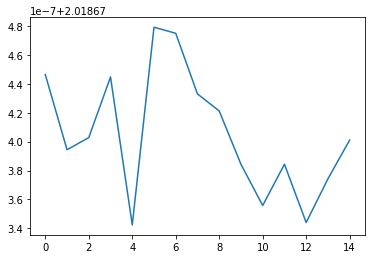

In [7]:
import matplotlib.pyplot as plt
plt.plot(h.history['loss'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.save('my_good.h5')